In [77]:
column_names = ['home_team', 'away_team', 'tournament', 'city', 'country', 'neutral',
                'year', 'month', 'day', 'Continent', 'Country', 'MaximumTemp_Month',
                'MinimumTemp_Month', 'HomeTeamRank', 'AwayTeamRank']

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import joblib

In [79]:
#this is main schedule of fifa which we have to predict
MainSchedule = pd.read_csv("MainSchedule.csv")
MainSchedule = MainSchedule.drop(["Unnamed: 0"],axis=1)
MainSchedule['MinimumTemp_Month'] = MainSchedule['MinimumTemp_Month'].astype(str)
MainSchedule['MaximumTemp_Month'] = MainSchedule['MaximumTemp_Month'].astype(str)
MainSchedule['HomeTeamRank'] = MainSchedule['HomeTeamRank'].astype(str)
MainSchedule['AwayTeamRank'] = MainSchedule['AwayTeamRank'].astype(str)

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib as plt
import seaborn as sns

# Load the dataset and split into training and testing sets
# Assuming you have already loaded the dataset and split it into X_train, X_test, y_train, and y_test
from sklearn.model_selection import train_test_split
# Load the dataset
dataset = pd.read_csv("updated_dataset1.csv")

# Data Preprocessing
X = dataset.drop(columns=['MatchResult'])  # Features
y = dataset['MatchResult']  # Target variable



# Assuming you have loaded your dataset into X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical features
numeric_features = ['MaximumTemp_Month', 'MinimumTemp_Month', 'HomeTeamRank', 'AwayTeamRank']
categorical_features = ['home_team', 'away_team', 'tournament', 'city', 'country', 'Continent']

# Define preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the XGBoost model with hyperparameters
"""model = XGBClassifier(
    max_depth=5,  # Limit the depth of each tree to prevent overfitting
    learning_rate=0.1,  # Control the step size during the optimization process
    n_estimators=100,  # Number of boosted trees to fit
    reg_alpha=0.1,  # L1 regularization term on weights (to reduce overfitting)
    reg_lambda=0.1,  # L2 regularization term on weights (to reduce overfitting)
    random_state=42
)"""
# Define the XGBoost model with hyperparameters and regularization
# Define the XGBoost model with adjusted hyperparameters and regularization
model = XGBClassifier(
    max_depth=3,  # Adjust the maximum depth of each tree
    learning_rate=0.1,
    n_estimators=100,
    reg_alpha=0.1,  # Increase regularization strength
    reg_lambda=0.1,
    random_state=42
)


# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = pipeline.predict(X_train)

# Calculate training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)
#print("Training Accuracy:", training_accuracy)

# Make predictions on the test set
y_test_pred = pipeline.predict(X_test)

# Calculate testing accuracy
testing_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", testing_accuracy)

import joblib
joblib.dump(model, 'xgboost_model1.joblib')

Testing Accuracy: 0.7075386012715713


['xgboost_model1.joblib']

In [81]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


Testing Accuracy: 0.7075386012715713
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.75      0.70       351
           1       0.74      0.85      0.79       605
           2       0.00      0.00      0.00       145

    accuracy                           0.71      1101
   macro avg       0.46      0.53      0.50      1101
weighted avg       0.62      0.71      0.66      1101



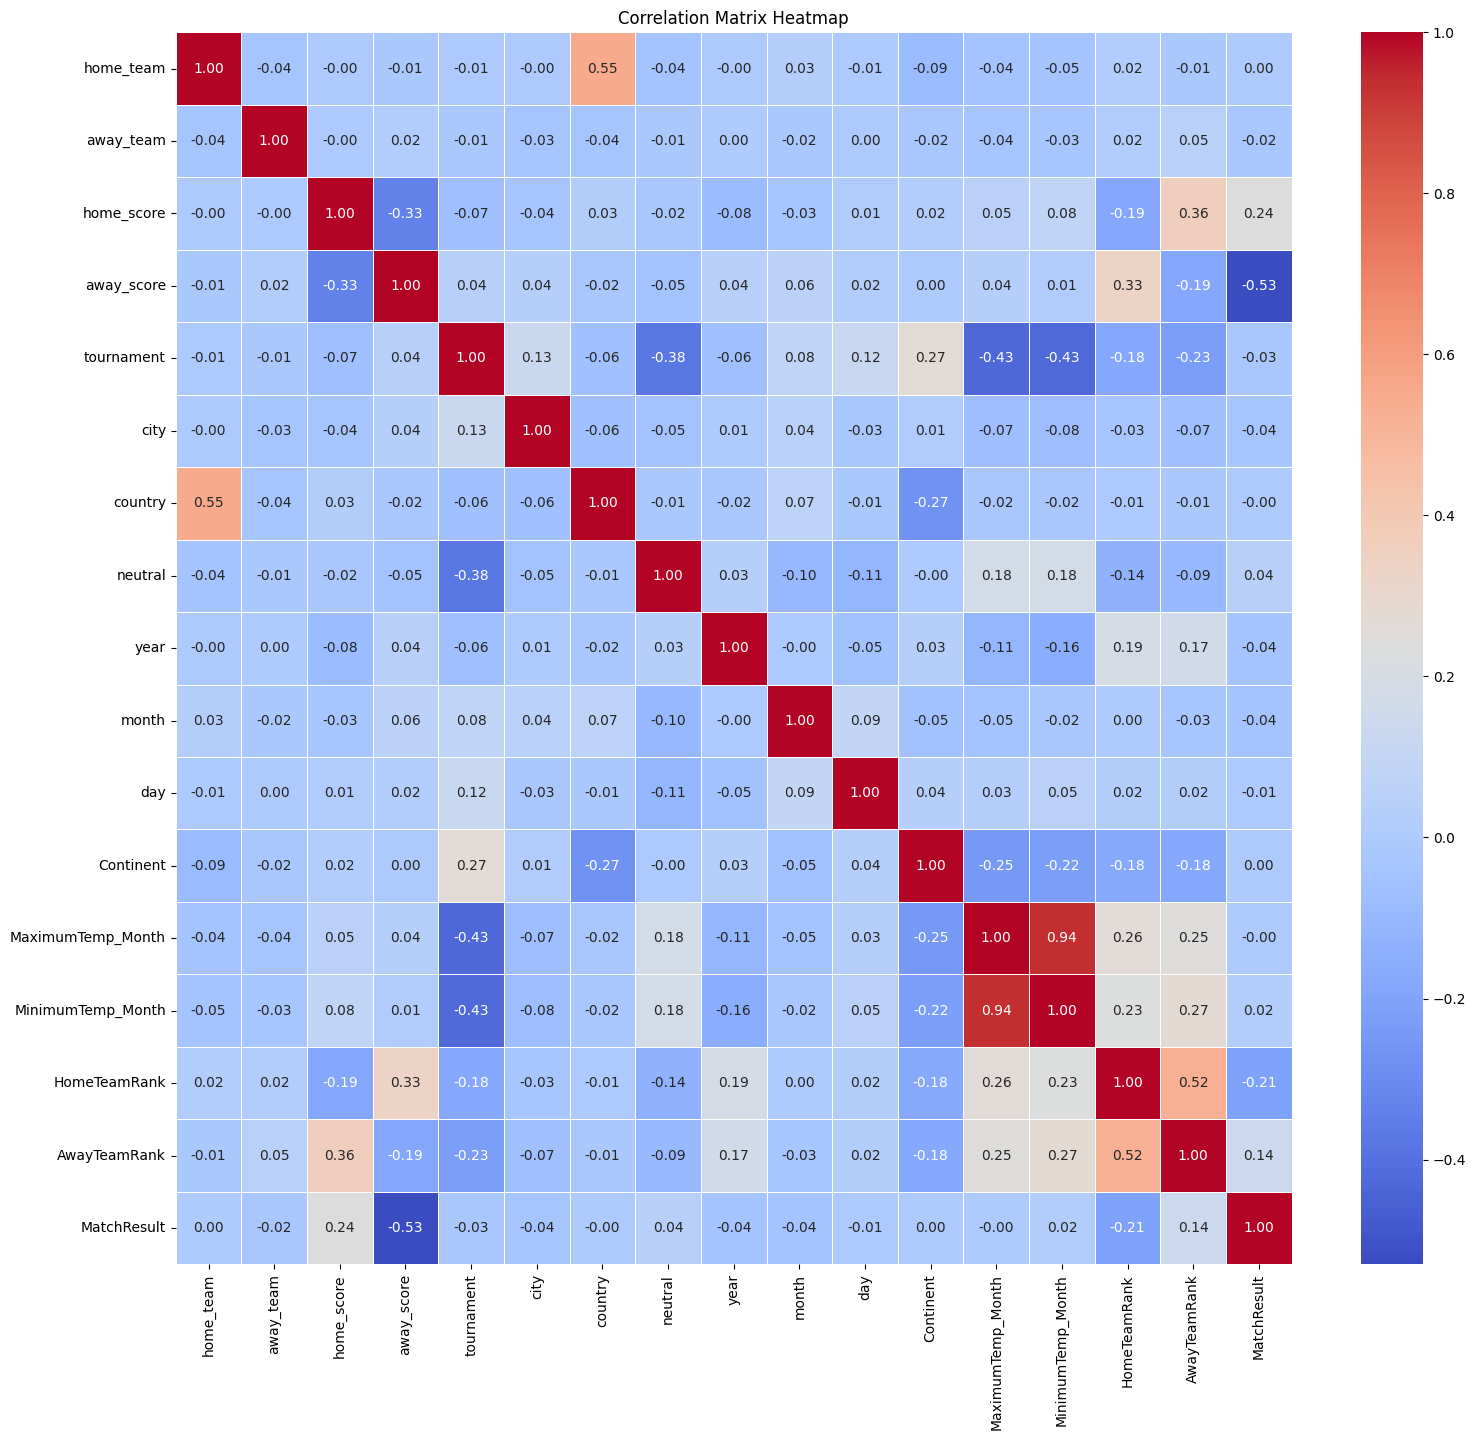

In [82]:
from sklearn.metrics import classification_report

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = pipeline.predict(X_train)

# Calculate training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)
#print("Training Accuracy:", training_accuracy)

# Make predictions on the test set
y_test_pred = pipeline.predict(X_test)

# Calculate testing accuracy
testing_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", testing_accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))






from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

df = dataset.copy()

label_encoder = preprocessing.LabelEncoder() 
df['away_team']= label_encoder.fit_transform(df['away_team']) 
df['tournament']= label_encoder.fit_transform(df['tournament'])
df['city']= label_encoder.fit_transform(df['city'])
df['country']= label_encoder.fit_transform(df['country'])
df['home_team']= label_encoder.fit_transform(df['home_team'])
df['neutral']= label_encoder.fit_transform(df['neutral'])
df['month']= label_encoder.fit_transform(df['month'])
df['Continent']= label_encoder.fit_transform(df['Continent'])

# Compute the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title and labels
plt.title('Correlation Matrix Heatmap')
plt.show()



# GroupA

In [83]:
from collections import Counter

In [84]:
GroupA = ["New Zealand", "Norway" , "Philippines", "Switzerland"]
GroupA_df = MainSchedule[(MainSchedule["home_team"] == "Norway") | (MainSchedule["away_team"] == "Norway") |
            (MainSchedule["home_team"] == "Philippines") | (MainSchedule["away_team"] == "Philippines") |
            (MainSchedule["home_team"] == "Switzerland") | (MainSchedule["away_team"] == "Switzerland") |
            (MainSchedule["home_team"] == "New Zealand") | (MainSchedule["away_team"] == "New Zealand")]

GroupA_df.reset_index(drop=True, inplace=True)

winner = []
looser = []
draw = []
for index,row in GroupA_df.iterrows():
    new_entry_df = pd.DataFrame([row], columns=column_names)
    new_entry_preprocessed = preprocessor.transform(new_entry_df)
    prediction = model.predict(new_entry_preprocessed)
    if prediction[0] == 1:
        winner.append(row["home_team"])
        looser.append(row["away_team"])
    elif prediction[0] == 0:
        winner.append(row["away_team"])
        looser.append(row["home_team"])
    else:
        draw.append(row["home_team"])
        draw.append(row["away_team"])

GroupA = ["New Zealand", "Norway" , "Philippines", "Switzerland"]
GroupA_pointstable = pd.DataFrame({"Team": GroupA})

P = [3,3,3,3]
W = []
D = []
L = []

GroupA_pointstable["P"] = P
for i in range(len(GroupA_pointstable)):
    W.append(Counter(winner)[GroupA_pointstable.Team[i]])
    L.append(Counter(looser)[GroupA_pointstable.Team[i]])
    D.append(Counter(draw)[GroupA_pointstable.Team[i]])

GroupA_pointstable["W"] = W
GroupA_pointstable["D"] = D
GroupA_pointstable["L"] = L

PTS = []
for i in range(len(GroupA_pointstable)):
    PTS.append((GroupA_pointstable.W[i] *3) + GroupA_pointstable.D[i])

GroupA_pointstable["PTS"] = PTS

GroupA_pointstable = GroupA_pointstable.sort_values(by='PTS', ascending=False)
GroupA_pointstable.reset_index(drop=True, inplace=True)

rank = []
for i in range(len(GroupA_pointstable)):
    rank.append(int(MainSchedule[MainSchedule["home_team"] == GroupA_pointstable["Team"][i]]["HomeTeamRank"].values[0]))
    
GroupA_pointstable["rank"] = rank

GroupA_pointstable = GroupA_pointstable.sort_values(by=['PTS', 'rank'], ascending=[False, True])

GroupA_pointstable = GroupA_pointstable.drop(["rank"],axis=1)
GroupA_pointstable.reset_index(drop=True, inplace=True)
GroupA_pointstable

,Team,P,W,D,L,PTS
0,Norway,3,3,0,0,9
1,Switzerland,3,2,0,1,6
2,New Zealand,3,1,0,2,3
3,Philippines,3,0,0,3,0


# GroupB

In [85]:
GroupB = ["Australia", "Canada" , "Nigeria", "Republic of Ireland"]
GroupB_df = MainSchedule[(MainSchedule["home_team"] == "Australia") | (MainSchedule["away_team"] == "Australia") |
            (MainSchedule["home_team"] == "Canada") | (MainSchedule["away_team"] == "Canada") |
            (MainSchedule["home_team"] == "Nigeria") | (MainSchedule["away_team"] == "Nigeria") |
            (MainSchedule["home_team"] == "Republic of Ireland") | (MainSchedule["away_team"] == "Republic of Ireland")]

GroupB_df.reset_index(drop=True, inplace=True)

winner = []
looser = []
draw = []
for index,row in GroupB_df.iterrows():
    new_entry_df = pd.DataFrame([row], columns=column_names)
    new_entry_preprocessed = preprocessor.transform(new_entry_df)
    prediction = model.predict(new_entry_preprocessed)
    if prediction[0] == 1:
        winner.append(row["home_team"])
        looser.append(row["away_team"])
    elif prediction[0] == 0:
        winner.append(row["away_team"])
        looser.append(row["home_team"])
    else:
        draw.append(row["home_team"])
        draw.append(row["away_team"])

GroupB_pointstable = pd.DataFrame({"Team": GroupB})

P = [3,3,3,3]
W = []
D = []
L = []

GroupB_pointstable["P"] = P
for i in range(len(GroupA_pointstable)):
    W.append(Counter(winner)[GroupB_pointstable.Team[i]])
    L.append(Counter(looser)[GroupB_pointstable.Team[i]])
    D.append(Counter(draw)[GroupB_pointstable.Team[i]])

GroupB_pointstable["W"] = W
GroupB_pointstable["D"] = D
GroupB_pointstable["L"] = L

PTS = []
for i in range(len(GroupB_pointstable)):
    PTS.append((GroupB_pointstable.W[i] *3) + GroupB_pointstable.D[i])

GroupB_pointstable["PTS"] = PTS

GroupB_pointstable = GroupB_pointstable.sort_values(by='PTS', ascending=False)
GroupB_pointstable.reset_index(drop=True, inplace=True)

rank = []
for i in range(len(GroupB_pointstable)):
    rank.append(int(MainSchedule[MainSchedule["home_team"] == GroupB_pointstable["Team"][i]]["HomeTeamRank"].values[0]))
    
GroupB_pointstable["rank"] = rank

GroupB_pointstable = GroupB_pointstable.sort_values(by=['PTS', 'rank'], ascending=[False, True])

GroupB_pointstable = GroupB_pointstable.drop(["rank"],axis=1)
GroupB_pointstable.reset_index(drop=True, inplace=True)
GroupB_pointstable

,Team,P,W,D,L,PTS
0,Canada,3,3,0,0,9
1,Australia,3,2,0,1,6
2,Republic of Ireland,3,1,0,2,3
3,Nigeria,3,0,0,3,0


# GroupC

In [86]:
GroupC = ["Costa Rica", "Japan", "Spain", "Zambia"]
GroupC_df = MainSchedule[(MainSchedule["home_team"] == "Costa Rica") | (MainSchedule["away_team"] == "Costa Rica") |
            (MainSchedule["home_team"] == "Japan") | (MainSchedule["away_team"] == "Japan") |
            (MainSchedule["home_team"] == "Spain") | (MainSchedule["away_team"] == "Spain") |
            (MainSchedule["home_team"] == "Zambia") | (MainSchedule["away_team"] == "Zambia")]

GroupC_df.reset_index(drop=True, inplace=True)

winner = []
looser = []
draw = []
for index,row in GroupC_df.iterrows():
    new_entry_df = pd.DataFrame([row], columns=column_names)
    new_entry_preprocessed = preprocessor.transform(new_entry_df)
    prediction = model.predict(new_entry_preprocessed)
    if prediction[0] == 1:
        winner.append(row["home_team"])
        looser.append(row["away_team"])
    elif prediction[0] == 0:
        winner.append(row["away_team"])
        looser.append(row["home_team"])
    else:
        draw.append(row["home_team"])
        draw.append(row["away_team"])

GroupC_pointstable = pd.DataFrame({"Team": GroupC})

P = [3,3,3,3]
W = []
D = []
L = []

GroupC_pointstable["P"] = P
for i in range(len(GroupC_pointstable)):
    W.append(Counter(winner)[GroupC_pointstable.Team[i]])
    L.append(Counter(looser)[GroupC_pointstable.Team[i]])
    D.append(Counter(draw)[GroupC_pointstable.Team[i]])

GroupC_pointstable["W"] = W
GroupC_pointstable["D"] = D
GroupC_pointstable["L"] = L

PTS = []
for i in range(len(GroupC_pointstable)):
    PTS.append((GroupC_pointstable.W[i] *3) + GroupC_pointstable.D[i])

GroupC_pointstable["PTS"] = PTS

GroupC_pointstable = GroupC_pointstable.sort_values(by='PTS', ascending=False)
GroupC_pointstable.reset_index(drop=True, inplace=True)

rank = []
for i in range(len(GroupC_pointstable)):
    rank.append(int(MainSchedule[MainSchedule["home_team"] == GroupC_pointstable["Team"][i]]["HomeTeamRank"].values[0]))
    
GroupC_pointstable["rank"] = rank

GroupC_pointstable = GroupC_pointstable.sort_values(by=['PTS', 'rank'], ascending=[False, True])

GroupC_pointstable = GroupC_pointstable.drop(["rank"],axis=1)
GroupC_pointstable.reset_index(drop=True, inplace=True)
GroupC_pointstable

,Team,P,W,D,L,PTS
0,Spain,3,3,0,0,9
1,Japan,3,2,0,1,6
2,Costa Rica,3,1,0,2,3
3,Zambia,3,0,0,3,0


In [87]:
"""Zambia: Played 3 matches, won 1, drew 2, lost 0, total points (PTS) = 5
Japan: Played 3 matches, won 1, drew 1, lost 0, total points (PTS) = 4
Costa Rica: Played 3 matches, won 0, drew 3, lost 0, total points (PTS) = 3
Spain: Played 3 matches, won 0, drew 2, lost 0, total points (PTS) = 2"""


'Zambia: Played 3 matches, won 1, drew 2, lost 0, total points (PTS) = 5\nJapan: Played 3 matches, won 1, drew 1, lost 0, total points (PTS) = 4\nCosta Rica: Played 3 matches, won 0, drew 3, lost 0, total points (PTS) = 3\nSpain: Played 3 matches, won 0, drew 2, lost 0, total points (PTS) = 2'

# GroupD

In [88]:
GroupD = ["China","Denmark", "England", "Haiti"]
GroupD_df = MainSchedule[(MainSchedule["home_team"] == "China") | (MainSchedule["away_team"] == "China") |
            (MainSchedule["home_team"] == "Denmark") | (MainSchedule["away_team"] == "Denmark") |
            (MainSchedule["home_team"] == "England") | (MainSchedule["away_team"] == "England") |
            (MainSchedule["home_team"] == "Haiti") | (MainSchedule["away_team"] == "Haiti")]

GroupD_df.reset_index(drop=True, inplace=True)

winner = []
looser = []
draw = []
for index,row in GroupD_df.iterrows():
    new_entry_df = pd.DataFrame([row], columns=column_names)
    new_entry_preprocessed = preprocessor.transform(new_entry_df)
    prediction = model.predict(new_entry_preprocessed)
    if prediction[0] == 1:
        winner.append(row["home_team"])
        looser.append(row["away_team"])
    elif prediction[0] == 0:
        winner.append(row["away_team"])
        looser.append(row["home_team"])
    else:
        draw.append(row["home_team"])
        draw.append(row["away_team"])

GroupD_pointstable = pd.DataFrame({"Team": GroupD})

P = [3,3,3,3]
W = []
D = []
L = []

GroupD_pointstable["P"] = P
for i in range(len(GroupD_pointstable)):
    W.append(Counter(winner)[GroupD_pointstable.Team[i]])
    L.append(Counter(looser)[GroupD_pointstable.Team[i]])
    D.append(Counter(draw)[GroupD_pointstable.Team[i]])

GroupD_pointstable["W"] = W
GroupD_pointstable["D"] = D
GroupD_pointstable["L"] = L

PTS = []
for i in range(len(GroupD_pointstable)):
    PTS.append((GroupD_pointstable.W[i] *3) + GroupD_pointstable.D[i])

GroupD_pointstable["PTS"] = PTS

GroupD_pointstable = GroupD_pointstable.sort_values(by='PTS', ascending=False)
GroupD_pointstable.reset_index(drop=True, inplace=True)

rank = []
for i in range(len(GroupD_pointstable)):
    rank.append(int(MainSchedule[MainSchedule["home_team"] == GroupD_pointstable["Team"][i]]["HomeTeamRank"].values[0]))
    
GroupD_pointstable["rank"] = rank

GroupD_pointstable = GroupD_pointstable.sort_values(by=['PTS', 'rank'], ascending=[False, True])

GroupD_pointstable = GroupD_pointstable.drop(["rank"],axis=1)
GroupD_pointstable.reset_index(drop=True, inplace=True)
GroupD_pointstable

,Team,P,W,D,L,PTS
0,England,3,3,0,0,9
1,Denmark,3,2,0,1,6
2,China,3,1,0,2,3
3,Haiti,3,0,0,3,0


# GroupE

In [89]:
GroupE = ["Netherlands", "Portugal" ,"USA","Vietnam"]
GroupE_df = MainSchedule[(MainSchedule["home_team"] == "Netherlands") | (MainSchedule["away_team"] == "Netherlands") |
            (MainSchedule["home_team"] == "Portugal") | (MainSchedule["away_team"] == "Portugal") |
            (MainSchedule["home_team"] == "USA") | (MainSchedule["away_team"] == "USA") |
            (MainSchedule["home_team"] == "Vietnam") | (MainSchedule["away_team"] == "Vietnam")]

GroupE_df.reset_index(drop=True, inplace=True)

winner = []
looser = []
draw = []
for index,row in GroupE_df.iterrows():
    new_entry_df = pd.DataFrame([row], columns=column_names)
    new_entry_preprocessed = preprocessor.transform(new_entry_df)
    prediction = model.predict(new_entry_preprocessed)
    if prediction[0] == 1:
        winner.append(row["home_team"])
        looser.append(row["away_team"])
    elif prediction[0] == 0:
        winner.append(row["away_team"])
        looser.append(row["home_team"])
    else:
        draw.append(row["home_team"])
        draw.append(row["away_team"])

GroupE_pointstable = pd.DataFrame({"Team": GroupE})

P = [3,3,3,3]
W = []
D = []
L = []

GroupE_pointstable["P"] = P
for i in range(len(GroupE_pointstable)):
    W.append(Counter(winner)[GroupE_pointstable.Team[i]])
    L.append(Counter(looser)[GroupE_pointstable.Team[i]])
    D.append(Counter(draw)[GroupE_pointstable.Team[i]])

GroupE_pointstable["W"] = W
GroupE_pointstable["D"] = D
GroupE_pointstable["L"] = L

PTS = []
for i in range(len(GroupE_pointstable)):
    PTS.append((GroupE_pointstable.W[i] *3) + GroupE_pointstable.D[i])

GroupE_pointstable["PTS"] = PTS

GroupE_pointstable = GroupE_pointstable.sort_values(by='PTS', ascending=False)
GroupE_pointstable.reset_index(drop=True, inplace=True)

rank = []
for i in range(len(GroupE_pointstable)):
    rank.append(int(MainSchedule[MainSchedule["home_team"] == GroupE_pointstable["Team"][i]]["HomeTeamRank"].values[0]))
    
GroupE_pointstable["rank"] = rank

GroupE_pointstable = GroupE_pointstable.sort_values(by=['PTS', 'rank'], ascending=[False, True])

GroupE_pointstable = GroupE_pointstable.drop(["rank"],axis=1)
GroupE_pointstable.reset_index(drop=True, inplace=True)
GroupE_pointstable

,Team,P,W,D,L,PTS
0,USA,3,3,0,0,9
1,Netherlands,3,2,0,1,6
2,Portugal,3,1,0,2,3
3,Vietnam,3,0,0,3,0


# GroupF

In [90]:
GroupF = ["France","Jamaica","Brazil","Panama"]
GroupF_df = MainSchedule[(MainSchedule["home_team"] == "France") | (MainSchedule["away_team"] == "France") |
            (MainSchedule["home_team"] == "Jamaica") | (MainSchedule["away_team"] == "Jamaica") |
            (MainSchedule["home_team"] == "Brazil") | (MainSchedule["away_team"] == "Brazil") |
            (MainSchedule["home_team"] == "Panama") | (MainSchedule["away_team"] == "Panama")]

GroupF_df.reset_index(drop=True, inplace=True)

winner = []
looser = []
draw = []
for index,row in GroupF_df.iterrows():
    new_entry_df = pd.DataFrame([row], columns=column_names)
    new_entry_preprocessed = preprocessor.transform(new_entry_df)
    prediction = model.predict(new_entry_preprocessed)
    if prediction[0] == 1:
        winner.append(row["home_team"])
        looser.append(row["away_team"])
    elif prediction[0] == 0:
        winner.append(row["away_team"])
        looser.append(row["home_team"])
    else:
        draw.append(row["home_team"])
        draw.append(row["away_team"])

GroupF_pointstable = pd.DataFrame({"Team": GroupF})

P = [3,3,3,3]
W = []
D = []
L = []

GroupF_pointstable["P"] = P
for i in range(len(GroupF_pointstable)):
    W.append(Counter(winner)[GroupF_pointstable.Team[i]])
    L.append(Counter(looser)[GroupF_pointstable.Team[i]])
    D.append(Counter(draw)[GroupF_pointstable.Team[i]])

GroupF_pointstable["W"] = W
GroupF_pointstable["D"] = D
GroupF_pointstable["L"] = L

PTS = []
for i in range(len(GroupF_pointstable)):
    PTS.append((GroupF_pointstable.W[i] *3) + GroupF_pointstable.D[i])

GroupF_pointstable["PTS"] = PTS

GroupF_pointstable = GroupF_pointstable.sort_values(by='PTS', ascending=False)
GroupF_pointstable.reset_index(drop=True, inplace=True)

rank = []
for i in range(len(GroupF_pointstable)):
    rank.append(int(MainSchedule[MainSchedule["home_team"] == GroupF_pointstable["Team"][i]]["HomeTeamRank"].values[0]))
    
GroupF_pointstable["rank"] = rank

GroupF_pointstable = GroupF_pointstable.sort_values(by=['PTS', 'rank'], ascending=[False, True])

GroupF_pointstable = GroupF_pointstable.drop(["rank"],axis=1)
GroupF_pointstable.reset_index(drop=True, inplace=True)
GroupF_pointstable

,Team,P,W,D,L,PTS
0,France,3,3,0,0,9
1,Brazil,3,2,0,1,6
2,Panama,3,1,0,2,3
3,Jamaica,3,0,0,3,0


# GroupG

In [91]:
GroupG = ["Sweden","South Africa","Italy","Argentina"]
GroupG_df = MainSchedule[(MainSchedule["home_team"] == "Sweden") | (MainSchedule["away_team"] == "Sweden") |
            (MainSchedule["home_team"] == "South Africa") | (MainSchedule["away_team"] == "South Africa") |
            (MainSchedule["home_team"] == "Italy") | (MainSchedule["away_team"] == "Italy") |
            (MainSchedule["home_team"] == "Argentina") | (MainSchedule["away_team"] == "Argentina")]

GroupG_df.reset_index(drop=True, inplace=True)

winner = []
looser = []
draw = []
for index,row in GroupG_df.iterrows():
    new_entry_df = pd.DataFrame([row], columns=column_names)
    new_entry_preprocessed = preprocessor.transform(new_entry_df)
    prediction = model.predict(new_entry_preprocessed)
    if prediction[0] == 1:
        winner.append(row["home_team"])
        looser.append(row["away_team"])
    elif prediction[0] == 0:
        winner.append(row["away_team"])
        looser.append(row["home_team"])
    else:
        draw.append(row["home_team"])
        draw.append(row["away_team"])

GroupG_pointstable = pd.DataFrame({"Team": GroupG})

P = [3,3,3,3]
W = []
D = []
L = []

GroupG_pointstable["P"] = P
for i in range(len(GroupG_pointstable)):
    W.append(Counter(winner)[GroupG_pointstable.Team[i]])
    L.append(Counter(looser)[GroupG_pointstable.Team[i]])
    D.append(Counter(draw)[GroupG_pointstable.Team[i]])

GroupG_pointstable["W"] = W
GroupG_pointstable["D"] = D
GroupG_pointstable["L"] = L

PTS = []
for i in range(len(GroupG_pointstable)):
    PTS.append((GroupG_pointstable.W[i] *3) + GroupG_pointstable.D[i])

GroupG_pointstable["PTS"] = PTS

GroupG_pointstable = GroupG_pointstable.sort_values(by='PTS', ascending=False)
GroupG_pointstable.reset_index(drop=True, inplace=True)

rank = []
for i in range(len(GroupG_pointstable)):
    rank.append(int(MainSchedule[MainSchedule["home_team"] == GroupG_pointstable["Team"][i]]["HomeTeamRank"].values[0]))
    
GroupG_pointstable["rank"] = rank

GroupG_pointstable = GroupG_pointstable.sort_values(by=['PTS', 'rank'], ascending=[False, True])

GroupG_pointstable = GroupG_pointstable.drop(["rank"],axis=1)
GroupG_pointstable.reset_index(drop=True, inplace=True)
GroupG_pointstable

,Team,P,W,D,L,PTS
0,Sweden,3,3,0,0,9
1,Italy,3,2,0,1,6
2,Argentina,3,1,0,2,3
3,South Africa,3,0,0,3,0


# GroupH

In [92]:
GroupH = ["Germany","Morocco","Colombia","South Korea"]
GroupH_df = MainSchedule[(MainSchedule["home_team"] == "Germany") | (MainSchedule["away_team"] == "Germany") |
            (MainSchedule["home_team"] == "Morocco") | (MainSchedule["away_team"] == "Morocco") |
            (MainSchedule["home_team"] == "Colombia") | (MainSchedule["away_team"] == "Colombia") |
            (MainSchedule["home_team"] == "South Korea") | (MainSchedule["away_team"] == "South Korea")]

GroupH_df.reset_index(drop=True, inplace=True)

winner = []
looser = []
draw = []
for index,row in GroupH_df.iterrows():
    new_entry_df = pd.DataFrame([row], columns=column_names)
    new_entry_preprocessed = preprocessor.transform(new_entry_df)
    prediction = model.predict(new_entry_preprocessed)
    if prediction[0] == 1:
        winner.append(row["home_team"])
        looser.append(row["away_team"])
    elif prediction[0] == 0:
        winner.append(row["away_team"])
        looser.append(row["home_team"])
    else:
        draw.append(row["home_team"])
        draw.append(row["away_team"])

GroupH_pointstable = pd.DataFrame({"Team": GroupH})

P = [3,3,3,3]
W = []
D = []
L = []

GroupH_pointstable["P"] = P
for i in range(len(GroupH_pointstable)):
    W.append(Counter(winner)[GroupH_pointstable.Team[i]])
    L.append(Counter(looser)[GroupH_pointstable.Team[i]])
    D.append(Counter(draw)[GroupH_pointstable.Team[i]])

GroupH_pointstable["W"] = W
GroupH_pointstable["D"] = D
GroupH_pointstable["L"] = L

PTS = []
for i in range(len(GroupH_pointstable)):
    PTS.append((GroupH_pointstable.W[i] *3) + GroupH_pointstable.D[i])

GroupH_pointstable["PTS"] = PTS

GroupH_pointstable = GroupH_pointstable.sort_values(by='PTS', ascending=False)
GroupH_pointstable.reset_index(drop=True, inplace=True)

rank = []
for i in range(len(GroupH_pointstable)):
    rank.append(int(MainSchedule[MainSchedule["home_team"] == GroupH_pointstable["Team"][i]]["HomeTeamRank"].values[0]))
    
GroupH_pointstable["rank"] = rank

GroupH_pointstable = GroupH_pointstable.sort_values(by=['PTS', 'rank'], ascending=[False, True])

GroupH_pointstable = GroupH_pointstable.drop(["rank"],axis=1)
GroupH_pointstable.reset_index(drop=True, inplace=True)
GroupH_pointstable

,Team,P,W,D,L,PTS
0,Germany,3,3,0,0,9
1,South Korea,3,2,0,1,6
2,Colombia,3,1,0,2,3
3,Morocco,3,0,0,3,0


# Round of 16

In [93]:
winner = []

In [94]:
#match16_1
home_team = GroupA_pointstable["Team"][0]
away_team = GroupC_pointstable["Team"][1]
tournament = "FIFA World Cup"
city = "Auckland"
country = "New Zealand"

if (home_team == "New Zealand" or away_team == "New Zealand" or home_team == "Australia" or away_team == "Australia"):
    neutral = False
else:
    neutral= True

year = 2023
month = "August"
day = 5
Continent = "Oceania"
Country = "New Zealand"
MaximumTemp_Month = '14'
MinimumTemp_Month = '11'
HomeTeamRank = MainSchedule[MainSchedule["home_team"] == home_team ]["HomeTeamRank"].values[0]
AwayTeamRank = MainSchedule[MainSchedule["home_team"] == away_team ]["HomeTeamRank"].values[0]

match16_1_df = [home_team,away_team,tournament,city,country,neutral,year,month,day,Continent,Country,MaximumTemp_Month,MinimumTemp_Month,HomeTeamRank,AwayTeamRank]
newentry = pd.DataFrame([match16_1_df], columns=column_names)

new_entry_preprocessed = preprocessor.transform(newentry)
prediction = model.predict(new_entry_preprocessed)
if prediction[0] == 0:
    winner.append(newentry["home_team"][0])
elif prediction[0] == 1:
    winner.append(newentry["away_team"][0])
else:
    draw.append(newentry["home_team"][0])
    draw.append(newentry["away_team"][0])


In [95]:
winner[0]

'Japan'

In [96]:
home_team = GroupC_pointstable["Team"][0]
away_team = GroupA_pointstable["Team"][1]
tournament = "FIFA World Cup"
city = "Wellington"
country = "New Zealand"

if (home_team == "New Zealand" or away_team == "New Zealand" or home_team == "Australia" or away_team == "Australia"):
    neutral = False
else:
    neutral= True

year = 2023
month = "August"
day = 5
Continent = "Oceania"
Country = "New Zealand"
MaximumTemp_Month = '14'
MinimumTemp_Month = '11'
HomeTeamRank = MainSchedule[MainSchedule["home_team"] == home_team]["HomeTeamRank"].values[0]
AwayTeamRank = MainSchedule[MainSchedule["home_team"] == away_team]["HomeTeamRank"].values[0]

match16_1_df = [home_team,away_team,tournament,city,country,neutral,year,month,day,Continent,Country,MaximumTemp_Month,MinimumTemp_Month,HomeTeamRank,AwayTeamRank]
newentry = pd.DataFrame([match16_1_df], columns=column_names)

new_entry_preprocessed = preprocessor.transform(newentry)
prediction = model.predict(new_entry_preprocessed)
if prediction[0] == 0:
    winner.append(newentry["home_team"][0])
elif prediction[0] == 1:
    winner.append(newentry["away_team"][0])
else:
    draw.append(newentry["home_team"][0])
    draw.append(newentry["away_team"][0])

In [97]:
winner[1]

'Switzerland'

In [98]:

home_team = GroupE_pointstable["Team"][0]
away_team = GroupG_pointstable["Team"][1]
tournament = "FIFA World Cup"
city = "Sydney"
country = "Australia"

if (home_team == "New Zealand" or away_team == "New Zealand" or home_team == "Australia" or away_team == "Australia"):
    neutral = False
else:
    neutral= True

year = 2023
month = "August"
day = 6
Continent = "Oceania"
Country = "Australia"
MaximumTemp_Month = '19'
MinimumTemp_Month = '9'
HomeTeamRank = MainSchedule[MainSchedule["home_team"] == home_team]["HomeTeamRank"].values[0]
AwayTeamRank = MainSchedule[MainSchedule["home_team"] == away_team]["HomeTeamRank"].values[0]

match16_1_df = [home_team,away_team,tournament,city,country,neutral,year,month,day,Continent,Country,MaximumTemp_Month,MinimumTemp_Month,HomeTeamRank,AwayTeamRank]
newentry = pd.DataFrame([match16_1_df], columns=column_names)

new_entry_preprocessed = preprocessor.transform(newentry)
prediction = model.predict(new_entry_preprocessed)
if prediction[0] == 0:
    winner.append(newentry["home_team"][0])
elif prediction[0] == 1:
    winner.append(newentry["away_team"][0])
else:
    draw.append(newentry["home_team"][0])
    draw.append(newentry["away_team"][0])

# Append the correct winner to the winner list
if len(winner) == 2:
    winner.append(newentry["home_team"][0])




In [99]:
winner[2]

'Italy'

In [100]:
home_team = GroupG_pointstable["Team"][0]
away_team = GroupE_pointstable["Team"][1]
tournament = "FIFA World Cup"
city = "Melbourne"
country = "Australia"

if (home_team == "New Zealand" or away_team == "New Zealand" or home_team == "Australia" or away_team == "Australia"):
    neutral = False
else:
    neutral= True

year = 2023
month = "August"
day = 6
Continent = "Oceania"
Country = "Australia"
MaximumTemp_Month = '19'
MinimumTemp_Month = '9'
HomeTeamRank = MainSchedule[MainSchedule["home_team"] == home_team]["HomeTeamRank"].values[0]
AwayTeamRank = MainSchedule[MainSchedule["home_team"] == away_team]["HomeTeamRank"].values[0]

match16_1_df = [home_team,away_team,tournament,city,country,neutral,year,month,day,Continent,Country,MaximumTemp_Month,MinimumTemp_Month,HomeTeamRank,AwayTeamRank]
newentry = pd.DataFrame([match16_1_df], columns=column_names)

new_entry_preprocessed = preprocessor.transform(newentry)
prediction = model.predict(new_entry_preprocessed)
if prediction[0] == 0:
    winner.append(newentry["home_team"][0])
elif prediction[0] == 1:
    winner.append(newentry["away_team"][0])
else:
    draw.append(newentry["home_team"][0])
    draw.append(newentry["away_team"][0])

# Add the winner of the match to the winner list
if len(winner) == 3:
    winner.append(newentry["home_team"][0])




In [101]:
winner[3]

'Netherlands'

In [102]:

home_team = GroupD_pointstable["Team"][0]
away_team = GroupB_pointstable["Team"][1]
tournament = "FIFA World Cup"
city = "Brisbane"
country = "Australia"

if (home_team == "New Zealand" or away_team == "New Zealand" or home_team == "Australia" or away_team == "Australia"):
    neutral = False
else:
    neutral= True

year = 2023
month = "August"
day = 7
Continent = "Oceania"
Country = "Australia"
MaximumTemp_Month = '19'
MinimumTemp_Month = '9'
HomeTeamRank = MainSchedule[MainSchedule["home_team"] == home_team]["HomeTeamRank"].values[0]
AwayTeamRank = MainSchedule[MainSchedule["home_team"] == away_team]["HomeTeamRank"].values[0]

match16_1_df = [home_team,away_team,tournament,city,country,neutral,year,month,day,Continent,Country,MaximumTemp_Month,MinimumTemp_Month,HomeTeamRank,AwayTeamRank]
newentry = pd.DataFrame([match16_1_df], columns=column_names)

new_entry_preprocessed = preprocessor.transform(newentry)
prediction = model.predict(new_entry_preprocessed)
if prediction[0] == 0:
    winner.append(newentry["home_team"][0])
elif prediction[0] == 1:
    winner.append(newentry["away_team"][0])
else:
    draw.append(newentry["home_team"][0])
    draw.append(newentry["away_team"][0])

# Add the winner of the match to the winner list
if len(winner) == 4:
    winner.append(newentry["home_team"][0])

winner[4]


'Australia'

In [103]:

home_team = GroupB_pointstable["Team"][0]
away_team = GroupD_pointstable["Team"][1]
tournament = "FIFA World Cup"
city = "Sydney"
country = "Australia"

if (home_team == "New Zealand" or away_team == "New Zealand" or home_team == "Australia" or away_team == "Australia"):
    neutral = False
else:
    neutral= True

year = 2023
month = "August"
day = 7
Continent = "Oceania"
Country = "Australia"
MaximumTemp_Month = '19'
MinimumTemp_Month = '9'
HomeTeamRank = MainSchedule[MainSchedule["home_team"] == home_team]["HomeTeamRank"].values[0]
AwayTeamRank = MainSchedule[MainSchedule["home_team"] == away_team]["HomeTeamRank"].values[0]

match16_1_df = [home_team,away_team,tournament,city,country,neutral,year,month,day,Continent,Country,MaximumTemp_Month,MinimumTemp_Month,HomeTeamRank,AwayTeamRank]
newentry = pd.DataFrame([match16_1_df], columns=column_names)

new_entry_preprocessed = preprocessor.transform(newentry)
prediction = model.predict(new_entry_preprocessed)
if prediction[0] == 0:
    winner.append(newentry["home_team"][0])
elif prediction[0] == 1:
    winner.append(newentry["away_team"][0])
else:
    draw.append(newentry["home_team"][0])
    draw.append(newentry["away_team"][0])

# Add the winner of the match to the winner list
if len(winner) == 5:
    winner.append(newentry["home_team"][0])

winner[5]


'Denmark'

In [104]:
winner[5]

'Denmark'

In [105]:
home_team = GroupH_pointstable["Team"][0]
away_team = GroupF_pointstable["Team"][1]
tournament = "FIFA World Cup"
city = "Melbourne"
country = "Australia"

if (home_team == "New Zealand" or away_team == "New Zealand" or home_team == "Australia" or away_team == "Australia"):
    neutral = False
else:
    neutral= True

year = 2023
month = "August"
day = 8
Continent = "Oceania"
Country = "Australia"
MaximumTemp_Month = '19'
MinimumTemp_Month = '9'
HomeTeamRank = MainSchedule[MainSchedule["home_team"] == home_team]["HomeTeamRank"].values[0]
AwayTeamRank = MainSchedule[MainSchedule["home_team"] == away_team]["HomeTeamRank"].values[0]
match16_1_df = [home_team,away_team,tournament,city,country,neutral,year,month,day,Continent,Country,MaximumTemp_Month,MinimumTemp_Month,HomeTeamRank,AwayTeamRank]
newentry = pd.DataFrame([match16_1_df], columns=column_names)

new_entry_preprocessed = preprocessor.transform(newentry)
prediction = model.predict(new_entry_preprocessed)
if prediction[0] == 0:
    winner.append(newentry["home_team"][0])
elif prediction[0] == 1:
    winner.append(newentry["away_team"][0])
else:
    draw.append(newentry["home_team"][0])
    draw.append(newentry["away_team"][0])

In [106]:
winner[6]

'Brazil'

In [107]:
home_team =GroupF_pointstable["Team"][0]
away_team = GroupH_pointstable["Team"][1]
tournament = "FIFA World Cup"
city = "Adelaide"
country = "Australia"

if (home_team == "New Zealand" or away_team == "New Zealand" or home_team == "Australia" or away_team == "Australia"):
    neutral = False
else:
    neutral= True

year = 2023
month = "August"
day = 8
Continent = "Oceania"
Country = "Australia"
MaximumTemp_Month = '19'
MinimumTemp_Month = '9'
HomeTeamRank = MainSchedule[MainSchedule["home_team"] == home_team]["HomeTeamRank"].values[0]
AwayTeamRank = MainSchedule[MainSchedule["home_team"] == away_team]["HomeTeamRank"].values[0]

match16_1_df = [home_team,away_team,tournament,city,country,neutral,year,month,day,Continent,Country,MaximumTemp_Month,MinimumTemp_Month,HomeTeamRank,AwayTeamRank]
newentry = pd.DataFrame([match16_1_df], columns=column_names)

new_entry_preprocessed = preprocessor.transform(newentry)
prediction = model.predict(new_entry_preprocessed)
if prediction[0] == 0:
    winner.append(newentry["home_team"][0])
elif prediction[0] == 1:
    winner.append(newentry["away_team"][0])
else:
    draw.append(newentry["home_team"][0])
    draw.append(newentry["away_team"][0])

In [108]:
winner[7]

'South Korea'

In [109]:
winner

['Japan',
 'Switzerland',
 'Italy',
 'Netherlands',
 'Australia',
 'Denmark',
 'Brazil',
 'South Korea']

# Quater Finals

In [110]:
winner_QF = []

In [111]:
home_team = winner[1]
away_team = winner[3]
tournament = "FIFA World Cup"
city = "Wellington"
country = "New Zealand"

if (home_team == "New Zealand" or away_team == "New Zealand" or home_team == "Australia" or away_team == "Australia"):
    neutral = False
else:
    neutral= True

year = 2023
month = "August"
day = 11
Continent = "Oceania"
Country = "New Zealand"
MaximumTemp_Month = '14'
MinimumTemp_Month = '11'
HomeTeamRank = MainSchedule[MainSchedule["home_team"] == home_team]["HomeTeamRank"].values[0]
AwayTeamRank = MainSchedule[MainSchedule["home_team"] == away_team]["HomeTeamRank"].values[0]

match16_1_df = [home_team,away_team,tournament,city,country,neutral,year,month,day,Continent,Country,MaximumTemp_Month,MinimumTemp_Month,HomeTeamRank,AwayTeamRank]
newentry = pd.DataFrame([match16_1_df], columns=column_names)

new_entry_preprocessed = preprocessor.transform(newentry)
prediction = model.predict(new_entry_preprocessed)
if prediction[0] == 0:
    winner_QF.append(newentry["home_team"][0])
elif prediction[0] == 1:
    winner_QF.append(newentry["away_team"][0])
else:
    draw.append(newentry["home_team"][0])
    draw.append(newentry["away_team"][0])

In [112]:
winner_QF

['Switzerland']

In [113]:
home_team = winner[0]
away_team = winner[2]
tournament = "FIFA World Cup"
city = "Auckland"
country = "New Zealand"

if (home_team == "New Zealand" or away_team == "New Zealand" or home_team == "Australia" or away_team == "Australia"):
    neutral = False
else:
    neutral= True

year = 2023
month = "August"
day = 11
Continent = "Oceania"
Country = "New Zealand"
MaximumTemp_Month = '14'
MinimumTemp_Month = '11'
HomeTeamRank = MainSchedule[MainSchedule["home_team"] == home_team]["HomeTeamRank"].values[0]
AwayTeamRank = MainSchedule[MainSchedule["home_team"] == away_team]["HomeTeamRank"].values[0]

match16_1_df = [home_team,away_team,tournament,city,country,neutral,year,month,day,Continent,Country,MaximumTemp_Month,MinimumTemp_Month,HomeTeamRank,AwayTeamRank]
newentry = pd.DataFrame([match16_1_df], columns=column_names)

new_entry_preprocessed = preprocessor.transform(newentry)
prediction = model.predict(new_entry_preprocessed)
if prediction[0] == 0:
    winner_QF.append(newentry["home_team"][0])
elif prediction[0] == 1:
    winner_QF.append(newentry["away_team"][0])
else:
    draw.append(newentry["home_team"][0])
    draw.append(newentry["away_team"][0])

In [114]:
winner_QF

['Switzerland', 'Italy']

In [115]:
home_team = winner[4]
away_team = winner[6]
tournament = "FIFA World Cup"
city = "Brisbane"
country = "Australia"

if (home_team == "New Zealand" or away_team == "New Zealand" or home_team == "Australia" or away_team == "Australia"):
    neutral = False
else:
    neutral= True

year = 2023
month = "August"
day = 12
Continent = "Oceania"
Country = "Australia"
MaximumTemp_Month = '19'
MinimumTemp_Month = '9'
HomeTeamRank = MainSchedule[MainSchedule["home_team"] == home_team]["HomeTeamRank"].values[0]
AwayTeamRank = MainSchedule[MainSchedule["home_team"] == away_team]["HomeTeamRank"].values[0]

match16_1_df = [home_team,away_team,tournament,city,country,neutral,year,month,day,Continent,Country,MaximumTemp_Month,MinimumTemp_Month,HomeTeamRank,AwayTeamRank]
newentry = pd.DataFrame([match16_1_df], columns=column_names)

new_entry_preprocessed = preprocessor.transform(newentry)
prediction = model.predict(new_entry_preprocessed)
if prediction[0] == 0:
    winner_QF.append(newentry["home_team"][0])
elif prediction[0] == 1:
    winner_QF.append(newentry["away_team"][0])
else:
    winner_QF.append(newentry["home_team"][0])
    draw.append(newentry["away_team"][0])



In [116]:
winner_QF

['Switzerland', 'Italy', 'Brazil']

In [117]:

home_team = winner[5]
away_team = winner[7]
tournament = "FIFA World Cup"
city = "Sydney"
country = "Australia"

if (home_team == "New Zealand" or away_team == "New Zealand" or home_team == "Australia" or away_team == "Australia"):
    neutral = False
else:
    neutral= True

year = 2023
month = "August"
day = 12
Continent = "Oceania"
Country = "Australia"
MaximumTemp_Month = '19'
MinimumTemp_Month = '9'
HomeTeamRank = MainSchedule[MainSchedule["home_team"] == home_team]["HomeTeamRank"].values[0]
AwayTeamRank = MainSchedule[MainSchedule["home_team"] == away_team]["HomeTeamRank"].values[0]

match16_1_df = [home_team,away_team,tournament,city,country,neutral,year,month,day,Continent,Country,MaximumTemp_Month,MinimumTemp_Month,HomeTeamRank,AwayTeamRank]
newentry = pd.DataFrame([match16_1_df], columns=column_names)

new_entry_preprocessed = preprocessor.transform(newentry)
prediction = model.predict(new_entry_preprocessed)
if prediction[0] == 0:
    winner_QF.append(newentry["home_team"][0])
elif prediction[0] == 1:
    winner_QF.append(newentry["away_team"][0])
else:
    draw.append(newentry["home_team"][0])
    winner_QF.append(newentry["away_team"][0])


In [118]:
winner_QF

['Switzerland', 'Italy', 'Brazil', 'South Korea']

# Semi - Finals

In [119]:

# Initialize lists to store winners and losers of the semi-final matches
winner_sf = []
loser_sf = []

# Function to predict match outcome
def predict_match_outcome(home_team, away_team):
    # Prepare input data for the match
    match_data = {
        'home_team': [home_team],
        'away_team': [away_team],
        'tournament': ['FIFA World Cup'],
        'city': ['Auckland'],
        'country': ['New Zealand'],
        'neutral': [False],  # Assuming New Zealand is playing at home
        'year': [2023],
        'month': ['August'],
        'day': [15],
        'Continent': ['Oceania'],
        'MaximumTemp_Month': [14],  # Assuming temperature values
        'MinimumTemp_Month': [11],  # Assuming temperature values
        'HomeTeamRank': [MainSchedule[MainSchedule["home_team"] == home_team]["HomeTeamRank"].values[0]],
        'AwayTeamRank': [MainSchedule[MainSchedule["home_team"] == away_team]["HomeTeamRank"].values[0]]
    }
    match_df = pd.DataFrame(match_data)

    # Preprocess the match data
    match_preprocessed = preprocessor.transform(match_df)

    # Make prediction
    prediction = model.predict(match_preprocessed)

    # Return the predicted outcome
    if prediction[0] == 0:
        return home_team, away_team
    elif prediction[0] == 1:
        return away_team, home_team
    else:
        return home_team, away_team  # Predict home team as the winner in case of a draw

# Extract teams for the semi-final match
home_team = winner_QF[1]
away_team = winner_QF[0]

# Predict the outcome of the match
predicted_winner, predicted_loser = predict_match_outcome(home_team, away_team)

# Append the winner and loser to the respective lists
winner_sf.append(predicted_winner)
loser_sf.append(predicted_loser)

# Output the predicted winner of the semi-final match
print("Predicted winner of the semi-final match:", winner_sf)
print("loser_sf",loser_sf)


Predicted winner of the semi-final match: ['Switzerland']
loser_sf ['Italy']


In [120]:
# Function to predict match outcome
def predict_match_outcome(home_team, away_team):
    # Prepare input data for the match
    match_data = {
        'home_team': [home_team],
        'away_team': [away_team],
        'tournament': ['FIFA World Cup'],
        'city': ['Sydney'],
        'country': ['Australia'],
        'neutral': [False],  # Assuming the match is not played in a neutral venue
        'year': [2023],
        'month': ['August'],
        'day': [12],
        'Continent': ['Oceania'],
        'MaximumTemp_Month': [19],  # Assuming temperature values
        'MinimumTemp_Month': [9],    # Assuming temperature values
        'HomeTeamRank': [MainSchedule[MainSchedule["home_team"] == home_team]["HomeTeamRank"].values[0]],
        'AwayTeamRank': [MainSchedule[MainSchedule["home_team"] == away_team]["HomeTeamRank"].values[0]]
    }
    match_df = pd.DataFrame(match_data)

    # Preprocess the match data
    match_preprocessed = preprocessor.transform(match_df)

    # Make prediction
    prediction = model.predict(match_preprocessed)

    # Return the predicted outcome
    if prediction[0] == 0:
        return home_team, away_team
    elif prediction[0] == 1:
        return away_team, home_team
    else:
        return home_team, away_team  # Predict home team as the winner in case of a draw

# Extract teams for the semi-final match
home_team = winner_QF[2]
away_team = winner_QF[3]

# Predict the outcome of the match
predicted_winner, predicted_loser = predict_match_outcome(home_team, away_team)

# Append the winner and loser to the respective lists
winner_sf.append(predicted_winner)
loser_sf.append(predicted_loser)

# Output the predicted winner of the semi-final match
print("Predicted winner of the semi-final match:", winner_sf)
print("loser_sf",loser_sf)


Predicted winner of the semi-final match: ['Switzerland', 'South Korea']
loser_sf ['Italy', 'Brazil']


# Third place play-off

In [121]:
# Initialize list to store the winner of the third-place match
ThirdPlace = []

# Define the teams competing in the third-place match
home_team = loser_sf[0]
away_team = loser_sf[1]

# Set match details
tournament = "FIFA World Cup"
city = "Brisbane"
country = "Australia"
neutral = False  # Assuming the match is not played in a neutral venue
year = 2023
month = "August"
day = 19
Continent = "Oceania"
Country = "Australia"
MaximumTemp_Month = '19'
MinimumTemp_Month = '9'

# Get HomeTeamRank and AwayTeamRank from the dataset
HomeTeamRank = MainSchedule[MainSchedule["home_team"] == home_team]["HomeTeamRank"].values[0]
AwayTeamRank = MainSchedule[MainSchedule["home_team"] == away_team]["HomeTeamRank"].values[0]

# Prepare data for the match
match_data = {
    'home_team': [home_team],
    'away_team': [away_team],
    'tournament': [tournament],
    'city': [city],
    'country': [country],
    'neutral': [neutral],
    'year': [year],
    'month': [month],
    'day': [day],
    'Continent': [Continent],
    'MaximumTemp_Month': [MaximumTemp_Month],
    'MinimumTemp_Month': [MinimumTemp_Month],
    'HomeTeamRank': [HomeTeamRank],
    'AwayTeamRank': [AwayTeamRank]
}

# Create DataFrame for the match
newentry = pd.DataFrame(match_data)

# Preprocess the match data
new_entry_preprocessed = preprocessor.transform(newentry)

# Make prediction
prediction = model.predict(new_entry_preprocessed)

# Append the predicted winner to ThirdPlace list
if prediction[0] == 0:
    ThirdPlace.append(newentry["home_team"][0])
elif prediction[0] == 1:
    ThirdPlace.append(newentry["away_team"][0])
else:
    draw.append(newentry["home_team"][0])
    draw.append(newentry["away_team"][0])

# Output the predicted winner of the third-place match
print("Predicted winner of the third-place match:", ThirdPlace)



Predicted winner of the third-place match: ['Brazil']


# Finals

In [122]:
# Initialize list to store the winner of the finals
FinalsWinner = []

# Define the teams competing in the finals match
home_team = winner_sf[0]
away_team = winner_sf[1]

# Set match details
tournament = "FIFA World Cup"
city = "Sydney"
country = "Australia"
neutral = False  # Assuming the match is not played in a neutral venue
year = 2023
month = "August"
day = 20
Continent = "Oceania"
Country = "Australia"
MaximumTemp_Month = '19'
MinimumTemp_Month = '9'

# Get HomeTeamRank and AwayTeamRank from the dataset
HomeTeamRank = MainSchedule[MainSchedule["home_team"] == home_team]["HomeTeamRank"].values[0]
AwayTeamRank = MainSchedule[MainSchedule["home_team"] == away_team]["HomeTeamRank"].values[0]

# Prepare data for the match
match_data = {
    'home_team': [home_team],
    'away_team': [away_team],
    'tournament': [tournament],
    'city': [city],
    'country': [country],
    'neutral': [neutral],
    'year': [year],
    'month': [month],
    'day': [day],
    'Continent': [Continent],
    'MaximumTemp_Month': [MaximumTemp_Month],
    'MinimumTemp_Month': [MinimumTemp_Month],
    'HomeTeamRank': [HomeTeamRank],
    'AwayTeamRank': [AwayTeamRank]
}

# Create DataFrame for the match
newentry = pd.DataFrame(match_data)

# Preprocess the match data
new_entry_preprocessed = preprocessor.transform(newentry)

# Make prediction
prediction = model.predict(new_entry_preprocessed)

# Append the predicted winner to FinalsWinner list
if prediction[0] == 0:
    FinalsWinner.append(newentry["home_team"][0])
elif prediction[0] == 1:
    FinalsWinner.append(newentry["away_team"][0])
else:
    draw.append(newentry["home_team"][0])
    draw.append(newentry["away_team"][0])

# Output the predicted winner of the finals match
print("Predicted winner of the finals match:", FinalsWinner)


Predicted winner of the finals match: ['Switzerland']


In [123]:
FinalsWinner

['Switzerland']